In [2]:
#import the libraries

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [4]:
df=pd.read_csv("Automobile.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

In [6]:
print(df.describe())

        symboling  normalized_losses  wheel_base      length       width  \
count  201.000000         201.000000  201.000000  201.000000  201.000000   
mean     0.840796         125.189055   98.797015  174.200995   65.889055   
std      1.254802          33.572966    6.066366   12.322175    2.101471   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.800000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.500000   66.600000   
max      3.000000         256.000000  120.900000  208.100000   72.000000   

           height  curb_weight  engine_size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  201.000000   
mean    53.766667  2555.666667   126.875622    3.329701    3.261741   
std      2.447822   517.296727    41.546834    0.268166    0.317875   
min     47.800000  1488.000000 

In [8]:
print(df.head(4))

   symboling  normalized_losses         make fuel_type aspiration  \
0          3                168  alfa-romero       gas        std   
1          3                168  alfa-romero       gas        std   
2          1                168  alfa-romero       gas        std   
3          2                164         audi       gas        std   

  number_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0             two  convertible          rwd           front        88.6  ...   
1             two  convertible          rwd           front        88.6  ...   
2             two    hatchback          rwd           front        94.5  ...   
3            four        sedan          fwd           front        99.8  ...   

   engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.

In [18]:
newX=df.drop(['price','make','fuel_type','number_of_doors',"engine_location","body_style","drive_wheels","fuel_system","aspiration","engine_type","number_of_cylinders"],axis=1)
print(newX[0:3]) # check 
newY=df['price']

   symboling  normalized_losses  wheel_base  length  width  height  \
0          3                168        88.6   168.8   64.1    48.8   
1          3                168        88.6   168.8   64.1    48.8   
2          1                168        94.5   171.2   65.5    52.4   

   curb_weight  engine_size  bore  stroke  compression_ratio  horsepower  \
0         2548          130  3.47    2.68                9.0         111   
1         2548          130  3.47    2.68                9.0         111   
2         2823          152  2.68    3.47                9.0         154   

   peak_rpm  city_mpg  highway_mpg  
0      5000        21           27  
1      5000        21           27  
2      5000        19           26  


In [19]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

61 61


In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
rr100 = Ridge(alpha=100000) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [44]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [45]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [46]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.8755431757430103
linear regression test score: 0.758733298890459
ridge regression train score low alpha: 0.8755431097587512
ridge regression test score low alpha: 0.7588428429181233
ridge regression train score high alpha: 0.7858247859517355
ridge regression test score high alpha: 0.7922010757483184


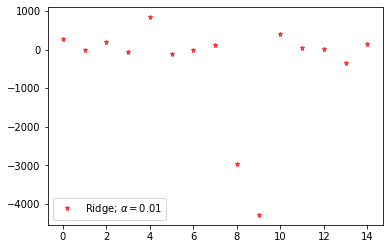

In [47]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
# zorder for ordering the markers
plt.legend()
plt.show()

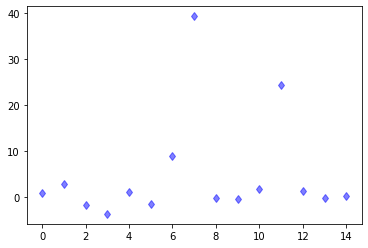

In [48]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

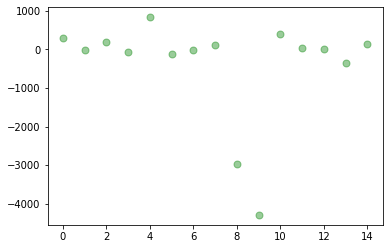

In [49]:
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

In [52]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [51]:
from sklearn.linear_model import Lasso

In [53]:
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.8755418524803461
test score:  0.7592223672433214
number of features used:  15


In [85]:
lasso00001 = Lasso(alpha=10000, max_iter=10e1)
lasso00001.fit(X_train,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=100.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [87]:
print("training score for alpha=0.0001:", train_score00001 )
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001: ", coeff_used00001)

training score for alpha=0.0001: 0.8139419013569686
test score for alpha =0.0001:  0.8131298765331603
number of features used: for alpha =0.0001:  4


In [88]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [89]:
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

LR training score: 0.8755431757430103
LR test score:  0.758733298890459


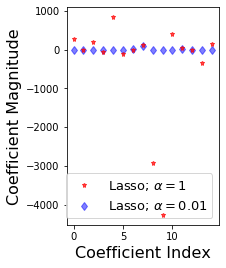

In [92]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

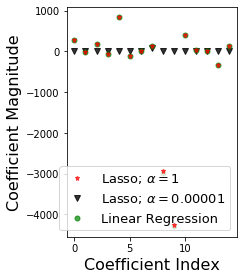

In [93]:
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [94]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [95]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [96]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 8.36483682
Optimal l1_ratio: 1.000
Number of iterations 37


In [97]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=8.364836818660871, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=37, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [98]:
print(r2_score(y_train, model.predict(X_train))) # training data performance

0.867550845817278


In [99]:
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.7899998084742075
